In [6]:
import requests
import gc
gc.collect()
import pandas as pd
import requests
import torch
print(torch.cuda.is_available())
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/preprocess_for_SQUAD_產品.csv',index_col=0)
print(df.shape)
df

True
(14267, 6)


,string_X_train,Y_label,EXPNO,from,string_Y_1,string_Y_2
0,SHIPMENT OFPVC SUSPENSION RESIN S65D QTY 18 MT...,PVC MASS RESIN B57,NaN,20210103.xlsx,81,99
1,17 MT PVC COPOLYMER RESIN C15 AT USD 1470 ...,PVC COPOLYMER,NaN,20210103.xlsx,8,21
2,TERMS OF SALE CIF NHAVA SHEVA PORT INDIA70 MT ...,PVC RESIN S60,NaN,20210103.xlsx,50,63
3,MASS PVC RESIN B57 QUANTITY 175 MT AT 1300 US...,MASS PVC RESIN B57,11G11F59,20210103.xlsx,1,19
4,PHTHALIC ANHYDRIDE PAQUANTITY 306 MT UNIT P...,PHTHALIC ANHYDRIDE,27P11346,20210103.xlsx,1,19
...,...,...,...,...,...,...
20732,PVC SUSPENSION RESIN S65D FOR 70MT AT USD 12...,PVC SUSPENSION RESIN S65D,NaN,20200712.xlsx,1,26
20733,7000 MT IN 4X20 FT CONTAINERS PVC RESIN S60 AS...,PVC RESIN S60,11G11J49,20200712.xlsx,30,43
20734,EPOXY RESIN NPEF178FOB ANY PORT OF TAIWAN,RESIN,NaN,20200712.xlsx,7,12
20735,EPOXY RESIN NPEL 128CIF SAVANNAH GA,NPEL,NaN,20200712.xlsx,12,16


# # 把國家名稱剃除 品名不能有國家

In [7]:
for i in ['TAIWAN','JAPAN','CHINA','AMERICA','INDIA']:
    print(df['Y_label'].str.contains(i).sum())
    print(df['Y_label'].str.contains(i.lower()).sum())

0
0
0
0
0
0
0
0
0
0


# 切分訓練/驗證

In [8]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# 執行訓練演算法

Global seed set to 42
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should pr


epoch:0 train_loss:0.4111289225573727 val_loss:0.3038400952374625
save best_model now_val_best_loss is:0.3038400952374625



epoch:1 train_loss:0.1987289710436996 val_loss:0.15345996607871978
save best_model now_val_best_loss is:0.15345996607871978



epoch:2 train_loss:0.10754643485007538 val_loss:0.12551134081436582
save best_model now_val_best_loss is:0.12551134081436582



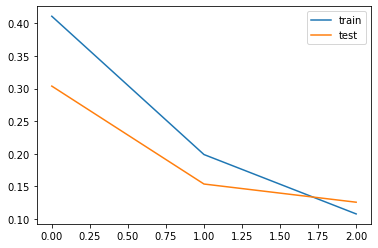

best_model is saved!


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this mode

In [9]:
url = 'https://gist.githubusercontent.com/skywalker0803r/1e1d0d25999094bf8ec23dc143e02478/raw/2b751c959a1b48a14e627eaf956f9ae3df821f46/bert_train_pipeline.py'
exec(requests.get(url).text)
qustion = 'What is the product name?'
model_path = '../models/Product_Data_SQuAD_model_product.pt'
res,table = bert_train_pipeline(train_df,val_df,qustion,model_path)

# 展示模型表現

In [10]:
display(res)
table.sample(30)

,jaccard,acc(1.0),acc(0.75),acc(0.5),acc(0.25)
0,0.949008,0.919061,0.924667,0.951997,0.980729


,Y_label,predict,是否全對
19401,MONO ETHYLENE GLYCOL,MONO ETHYLENE GLYCOL,Yes
4831,CARBON FIBER TC35,CARBON FIBER TC35,Yes
15341,POLYESTER PARTIALLY ORIENTED YARN,POLYESTER PARTIALLY ORIENTED YARN,Yes
3719,RESIN,RESIN,Yes
18309,PACK,PACK,Yes
18541,MONO ETHYLENE GLYCOL,MONO ETHYLENE GLYCOL,Yes
1802,IMPACT MODIFIER M31,PVC IMPACT MODIFIER M31,No
5449,HDPE,HDPE,Yes
3711,DOTP,DOTP,Yes
20513,MONO ETHYLENE GLYCOL,MONO ETHYLENE GLYCOL,Yes
